In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv")

In [3]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [4]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.775,NaN,S


In [5]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
51,943,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C


In [6]:
df=df1.append(df2)       #diğer yöntem df=df1.merge(df2)(yana mı alta mı eklenecek onu belirtmek lazım ama.)

C:\Users\Sarıkaya\AppData\Local\Temp\ipykernel_6620\1287341275.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)       #diğer yöntem df=df1.merge(df2)(yana mı alta mı eklenecek onu belirtmek lazım ama.)


In [7]:
df.shape

(1309, 12)

In [8]:
df.info()    #boş veriler çıktı

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()        #test dosyasında 418 survived boş gözüküyor

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df['Fare'].mean()        #fare sütununu doldurmak için adımlar....

33.2954792813456

In [11]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

##df['Embarked'].mean()       ###int olduğu için mean kullanamayız. o zamn boş verileri nasıl doldururuz

In [13]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df['Embarked']=df['Embarked'].fillna('S')

In [16]:
df.isnull().sum()      #Embarked sıfırlandı

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
#891 veriyi kullanarak 418 kişinin hayatta kalıp kalmadığını bulabilir misin
#train ile eğitip test edeceğiz
#toplamdaki verilerde boşluklar var. onları dolduruyoruz önce0 

In [18]:
import seaborn as sns

In [19]:
#hangi limandan kaç kişi binmiş?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

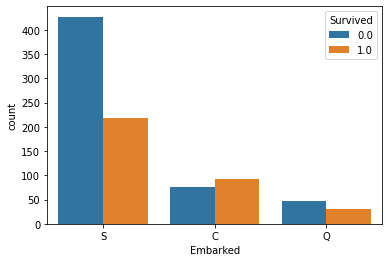

In [20]:
sns.countplot(x=df['Embarked'], hue="Survived", data=df)   #limanlardan binenlerin hayatta kalıp kalmama grafiği

In [21]:
#insanların isimlerinin hayatta kalıp kalmamaya etkisi??
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
111,112,0.0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
217,1109,NaN,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,NaN,S
472,473,1.0,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
453,454,1.0,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
852,853,0.0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C


In [22]:
df['Name'].value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [23]:
#Futere Eng... yeni bir alan yapalım 
#name den çıkart(str extract)
#boşluğu bul . ya kadar devam et 
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [24]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
#ünvanları modele dahil edersek nasıl etkiler?


In [26]:
#df['Title'].value_counts()      #az kişi olanları çok gruplara koyabiliriz

In [27]:
#


df['Title']=df['Title'].replace(['Ms', 'Mlle'], 'Miss')
df['Title']=df['Title'].replace(['Mme', 'Countress', 'Lady', 'Dona', 'Countess'], 'Mrs')
df['Title']=df['Title'].replace(['Rev', 'Jonkheer', 'Don', 'Sir', 'Col', 'Major', 'Dr', 'Capt'], 'Mr')

In [28]:
df['Title'].value_counts()    # az kişi olanlar gitti

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [29]:
df.isnull().sum()    #%20 den fazlası boşsa o sütunu silebiliriz

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [30]:
 1014/1309   #%77 boş, silelim

0.774637127578304

In [31]:
del df['Cabin']

In [32]:
df.isnull().sum()       #Cabin silindi

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

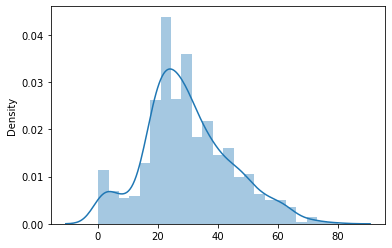

In [33]:
sns.distplot(x=df.Age)

In [34]:
df['Age'].describe()   #sadece o sütunun bilgileri   #burada ortalamayı kullanarak sütun doldurmak mantıklı mı?

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [35]:
df.groupby('Sex')['Age'].mean()    #kadınların ve erkeklerin yaş ortalaması

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [36]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform("median"))

In [37]:
df['Family']=df['SibSp']+df['Parch']+1       #+1 kendisi

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

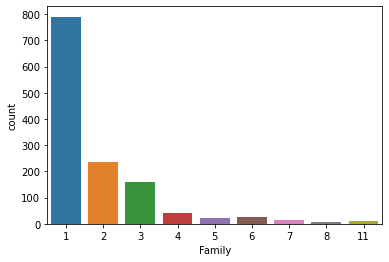

In [38]:
sns.countplot(df['Family'])

In [39]:
#boş verinin olmaması lazım. 
#survived hariç tüm boşlukları doldurduk, 
#boşluk doldurmayı öğrendik

df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [40]:
#bazı sütunlara ihtiyacımız kalmadı,silelim, 


df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [41]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
292,NaN,3,male,30.0,0,0,7.2292,C,Mr,1


In [42]:
data=pd.get_dummies(df,drop_first=True)

In [43]:
data    #artık buradan çalışacağzı

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [44]:
#datayı ayırdık

train=data[:891]
test=data[891:]

In [45]:
y=train['Survived']

In [46]:
x=train.drop('Survived', axis=1)    #hedefi siliyoruz

In [47]:
test      #survied silinmeli

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [48]:
test=test.drop('Survived', axis=1)

In [49]:
test

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [63]:
g.fit(x,y)


GaussianNB()

In [64]:
b.fit(x,y)

BernoulliNB()

In [70]:
tahmin=g.predict(test)

In [71]:
tahmin

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [67]:
accuracy_score(tahmin1,y)

0.7946127946127947

In [68]:
accuracy_score(tahmin2,y)

0.7856341189674523

In [72]:
sonuc=df2[['PassengerId']]

In [73]:
sonuc['Survived']=tahmin

C:\Users\Sarıkaya\AppData\Local\Temp\ipykernel_6620\2725349856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [74]:
sonuc.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [75]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

C:\Users\Sarıkaya\AppData\Local\Temp\ipykernel_6620\699227836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=sonuc['Survived'].astype('int32')


In [76]:
sonuc.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
h=GradientBoostingClassifier()

In [78]:
h.fit(x,y)

GradientBoostingClassifier()

In [80]:
tahmin3=h.predict(x)

In [81]:
accuracy_score(tahmin3,y)

0.8978675645342312

In [92]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax'),])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x,y, batch_size=32, epochs=70, verbose=1, validation_data=(x_test,y_test))

Epoch 1/70
28/28 [==============================] - 8s 125ms/step - loss: 1.3558 - accuracy: 0.5746 - val_loss: 0.8162 - val_accuracy: 0.5810
Epoch 2/70
28/28 [==============================] - 2s 81ms/step - loss: 0.8942 - accuracy: 0.6207 - val_loss: 0.6256 - val_accuracy: 0.6201
Epoch 3/70
28/28 [==============================] - 2s 72ms/step - loss: 0.7532 - accuracy: 0.6678 - val_loss: 0.5589 - val_accuracy: 0.6816
Epoch 4/70
28/28 [==============================] - 2s 81ms/step - loss: 0.6685 - accuracy: 0.6678 - val_loss: 0.5802 - val_accuracy: 0.7430
Epoch 5/70
28/28 [==============================] - 2s 78ms/step - loss: 0.6659 - accuracy: 0.6667 - val_loss: 0.5446 - val_accuracy: 0.7263
Epoch 6/70
28/28 [==============================] - 2s 55ms/step - loss: 0.6150 - accuracy: 0.6734 - val_loss: 0.5148 - val_accuracy: 0.7207
Epoch 7/70
28/28 [==============================] - 2s 64ms/step - loss: 0.5821 - accuracy: 0.7059 - val_loss: 0.4954 - val_accuracy: 0.7765
Epoch 8/70
2

Epoch 59/70
28/28 [==============================] - 2s 77ms/step - loss: 0.3955 - accuracy: 0.8350 - val_loss: 0.3823 - val_accuracy: 0.8045
Epoch 60/70
28/28 [==============================] - 2s 72ms/step - loss: 0.4017 - accuracy: 0.8451 - val_loss: 0.4047 - val_accuracy: 0.7821
Epoch 61/70
28/28 [==============================] - 2s 68ms/step - loss: 0.3975 - accuracy: 0.8339 - val_loss: 0.3875 - val_accuracy: 0.7933
Epoch 62/70
28/28 [==============================] - 3s 110ms/step - loss: 0.4099 - accuracy: 0.8204 - val_loss: 0.3801 - val_accuracy: 0.8101
Epoch 63/70
28/28 [==============================] - 3s 99ms/step - loss: 0.3968 - accuracy: 0.8283 - val_loss: 0.3601 - val_accuracy: 0.8212
Epoch 64/70
28/28 [==============================] - 2s 73ms/step - loss: 0.3881 - accuracy: 0.8339 - val_loss: 0.3672 - val_accuracy: 0.8156
Epoch 65/70
28/28 [==============================] - 2s 78ms/step - loss: 0.3953 - accuracy: 0.8339 - val_loss: 0.3737 - val_accuracy: 0.8324
Epoch

In [93]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %2f' % (accuracy*100))

6/6 [==============================] - 0s 13ms/step - loss: 0.3570 - accuracy: 0.8268
Accuracy: 82.681566


In [ ]:
#DL ile başarı oranım: 82,68----->epochs arttıkça başarı artıyor